# <font color='blue'>Producción de azúcar en Colombia para el año de 1995 a 2016</font> 
Brayan
Oscar
Neyfer

## Descriṕción de la serie de tiempo

Esta información es proporcionada por el Banco de la República a través de mediciones mensuales a nivel nacional, referente a la producción de algunos bienes del sector industrial en Colombia desde el año 1995 hasta el año 2016; dentro de esta información se incluyen bienes tales como: el cemento gris, lingotes de acero, carbón y azúcar.<br>
Para realizar el siguiente análisis de series de tiempo, **se selecciona la variable $\textbf{Producción de Azúcar}$**, medida a través de toneladas por mes. Como se mencionó, **la variable $\textbf{Producción de azúcar}$ es medida con una periodicidad mensual**, para lo cual **se tomará el rango de tiempo desde $\textbf{Febrero de 1995}$** hasta $\textbf{Marzo de 2016}$, teniendo así un total de **254 observaciones**.


# Análisis descriptivo

En el presente documento se usará Spyder y Jupyter como herramienta computacional, interfaces que posibilitan hacer uso de la teoria de series de tiempo univariadas desarrolladas a traves del curso para el objetivo en particular de analizar la serie de tiempo Producción de Azucár entre Febrero de 1995 y Marzo de 2016.

Para dar inicio al análisis de la serie de tiempo, se procede a cargar la base de datos y convertirla en un objeto de tipo serie de tiempo.

In [4]:


import pandas           as pd
import matplotlib.pylab as plt
import scipy            as sp
#import pmdarima         as pm
import numpy            as np
import math             as math

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools     import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools     import pacf

from statsmodels.tsa.arima_model   import ARIMA
#from arch                          import arch_model
from matplotlib.pylab              import rcParams

rcParams['figure.figsize'] = 15, 6



In [10]:
datap=pd.ExcelFile('C:/Users/YULY/Desktop/UNAL 2018/series de tiempo/codigos/industriadsd1995.xls')
tablap=datap.parse('Hoja1')

### solución error warnings en pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')

base = tablap['Azucar']
ind = pd.date_range(start= '1995/02', periods=254, freq='M')
SerieAz =pd.Series(base.values,index=ind)


html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



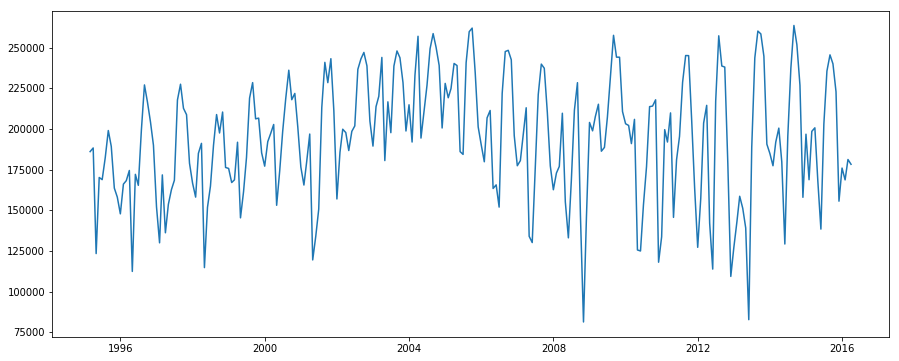

In [11]:
plt.plot(SerieAz)



En el gráfico anterior se puede observar que los valores de la serie no oscilan alredor de un mismo valor, es decir **la media no es la misma a lo largo del tiempo**. Por ejemplo, para los datos observados hasta el año 2003 se observa una media más baja comparada con los datos del año 2003 - 2005 aproximadamente. Luego a partir del año 2005 se observan valores con un cambio mucho más grande de mes a mes. Cabe mencionar además que, la serie presenta una tendencia lineal creciente para el año de 1996 - 2005, la cual ya se no presenta a partir de éste último año.

Una observación final sobre la serie es la **posible presencia de heterocedasticidad**, es decir, varianza no constante a lo largo del tiempo. Esto se puede intuir ya que hasta el año 2005 los cambios en la producción de azúcar cambian mucho menos a comparación de la producción a partir del año 2005.

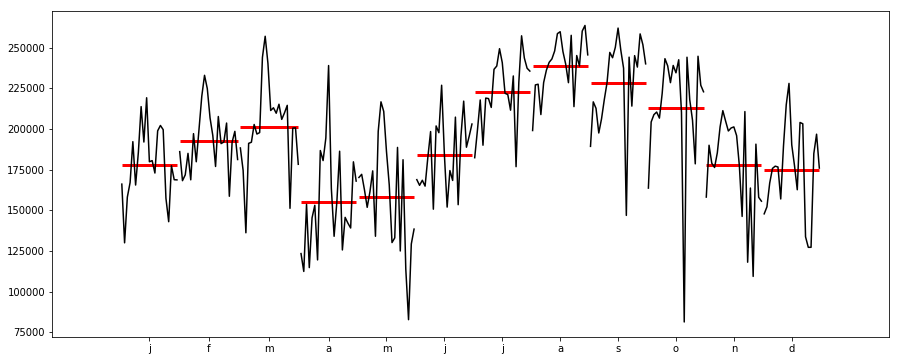

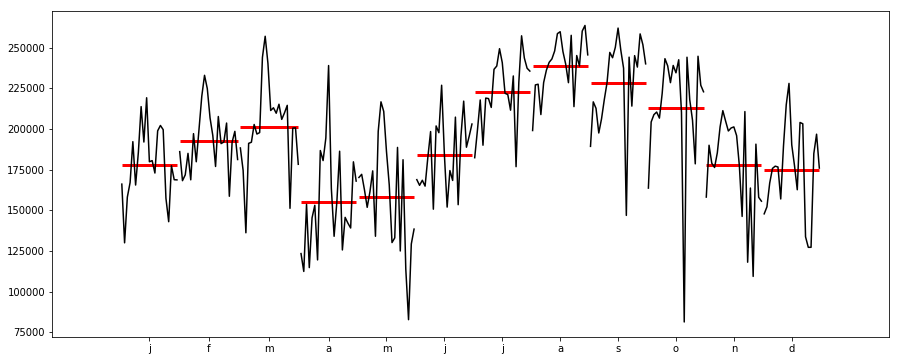

In [12]:
import statsmodels.api as smapi
smapi.graphics.tsa.month_plot(SerieAz)


El gráfico anterior muestra el comportamiento no estacionario de la serie de tiempo 
ya que la media de producción azucarera es diferente para cada mes.

# Identificación del modelo

### *Transformación Box-Cox*

Una alternativa para estabilizar la varianza de la serie, es el uso de la transformación Box - Cox, la cual se define como:

$$
f_x(U_t)=\left\{\begin{matrix}
 \displaystyle\frac{U_t^\lambda - 1}{\lambda} & \lambda>0\\ 
Ln (U_t) & \lambda=0
\end{matrix}\right.
$$

donde el valor de $\lambda$ es el valor objetivo, el cual es el que mejor se ajusta a los datos para lograr una mejor estabilización de la serie. Haciendo uso de la función $boxcox$ en python se obtiene dicho valor.

In [13]:
sp.stats.boxcox(SerieAz,alpha=0.05)



(array([1.21889238e+08, 1.24219924e+08, 6.39370831e+07, 1.05945899e+08,
        1.04639395e+08, 1.18071771e+08, 1.35497587e+08, 1.25237950e+08,
        9.96217861e+07, 9.43979701e+07, 8.49099465e+07, 1.01969856e+08,
        1.04024783e+08, 1.10179267e+08, 5.52359702e+07, 1.07830554e+08,
        1.01258056e+08, 1.35920269e+08, 1.66675340e+08, 1.54822633e+08,
        1.41151236e+08, 1.25952676e+08, 8.88274013e+07, 6.93981861e+07,
        1.07493158e+08, 7.46454261e+07, 9.02402989e+07, 9.87033882e+07,
        1.04269692e+08, 1.56135868e+08, 1.67173770e+08, 1.50381460e+08,
        1.46079806e+08, 1.14606450e+08, 1.02577133e+08, 9.43773409e+07,
        1.20794028e+08, 1.27155532e+08, 5.70562607e+07, 8.85569733e+07,
        1.00785171e+08, 1.25971423e+08, 1.46147958e+08, 1.33895765e+08,
        1.47857718e+08, 1.12007982e+08, 1.11436703e+08, 1.02905936e+08,
        1.04534273e+08, 1.27887826e+08, 8.27053612e+07, 9.75108769e+07,
        1.18287499e+08, 1.57439579e+08, 1.68309944e+08, 1.432693

Luego se sugiere tomar $\lambda = 1.57$ para transformar la serie. A continuación se muestra el gráfico de la serie transformada

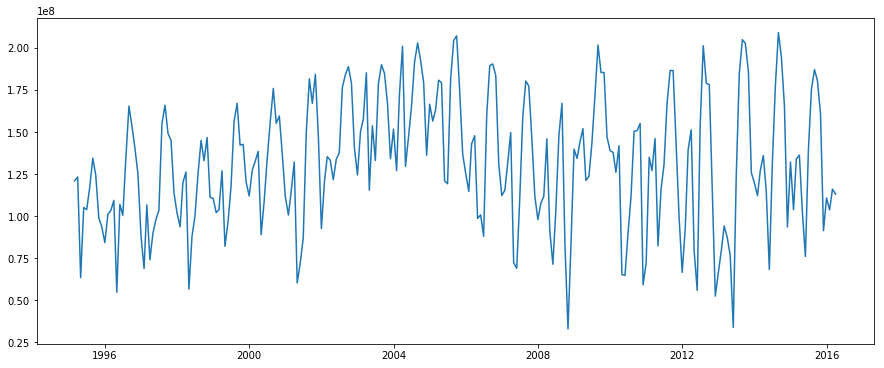

In [14]:
SerieT = sp.stats.boxcox(SerieAz,lmbda=1.571)
SerieT = pd.Series(SerieT,index=ind) 
plt.plot(SerieT)

Se observa que la serie sigue presentando las mismas característica mencionadas anteriormente, sin embargo los valores de estos cambios son más pequeños; por lo tanto se tomará la serie transformada para su análisis y posteriormente se retornará a los valores originales de la serie.


### *Prueba Raíz unitaria*

Se analizará la serie, de manera que se determine si presenta tanto raíz unitaria como raíz estacional y así ajustar un modelo Sarima, Arima o Arma.

Para empezar se hará uso de la prueba de Dickey Fuller la cual juzga la prueba para la tendencia dada por:

$\hspace{2cm}$ $ H_{0}:$ Hay presencia de raíz unitaria $\hspace{0.5cm}$ $\textbf{vs}$ $\hspace{0.5cm}$ $ H_{1}:$ No hay presencia de raíz unitaria

cabe mencionar que esta prueba es usada para determinar el número de diferenciaciones ordinarias usadas para la tendencia de la serie y así obtener una serie estacionaria. Si la serie presenta raíz unitaria para la tendencia se modelará de la siguiente manera:

* **Determinística** : Cuando la serie presenta una relación en función del tiempo $f(t)$, en este caso se ajustará un modelo $f(t)$ + ARMA(p,q).

* **Estocástica** : Cuando es necesario el uso de diferenciaciones ordinarias, en este caso se ajustará un modelo ARIMA.

A continuación se presenta la salida para la prueba de Dickey Fuller para la serie transformada, esto, para saber si existe **drift**(tendencia constante "c"), **lineal**(tendencia lineal "ct") y **No tendencia**(No tendencia determinística "nc").  


In [15]:

from statsmodels.tsa.stattools import adfuller
adf = adfuller(SerieT, regression='c')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -3.184762
p-value                          0.020884
#Lags Used                      14.000000
Number of Observations Used    239.000000
dtype: float64


In [16]:
adf = adfuller(SerieT, regression='ct')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -3.090695
p-value                          0.108461
#Lags Used                      14.000000
Number of Observations Used    239.000000
dtype: float64


In [17]:
adf = adfuller(SerieT, regression='nc')
adfoutput = pd.Series(adf[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (adfoutput)

Test Statistic                  -0.020276
p-value                          0.677494
#Lags Used                      16.000000
Number of Observations Used    237.000000
dtype: float64


Fijando $\alpha=0.05$ y observando los valores-p, según la prueba de Dickey Fuller, la serie no presenta una tendencia constante **(0.02)**, pero sí una tendencia lineal **(0.10)** y una tendencia estocástica **(0.67)**.

### Serie diferenciada ordinariamente

Para el caso de la tendencia lineal, la serie se diferencia ordinariamente una vez. Siguiendo esto, se procede a diferenciar la serie para luego obtener el gráfico de la función de autocorrelación simple y parcial.

Text(0.5, 1.0, 'Serie de producción de azucar diferenciada ordinariamente')

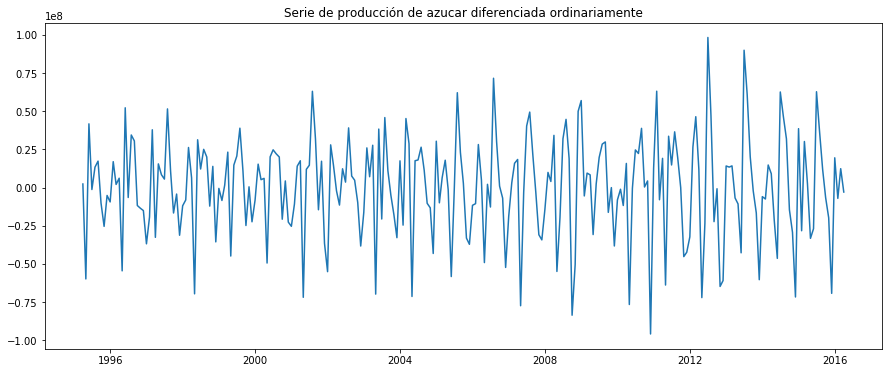

In [18]:
import statsmodels.api as smapi

SerieTd = SerieT.diff(periods=1)[1:]
plt.plot(SerieTd)
plt.title('Serie de producción de azucar diferenciada ordinariamente')

En el gráfico anterior se observa que la tendencia determinística ha sido eliminada. 


### ACF y PACF para la serie de tiempo diferenciada ordinariamente.

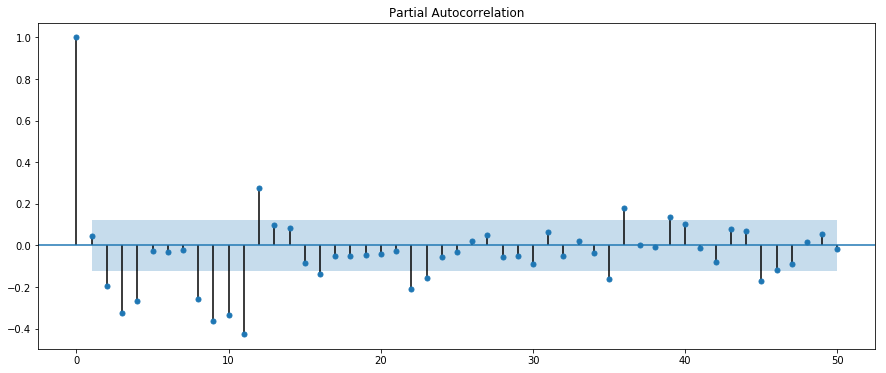

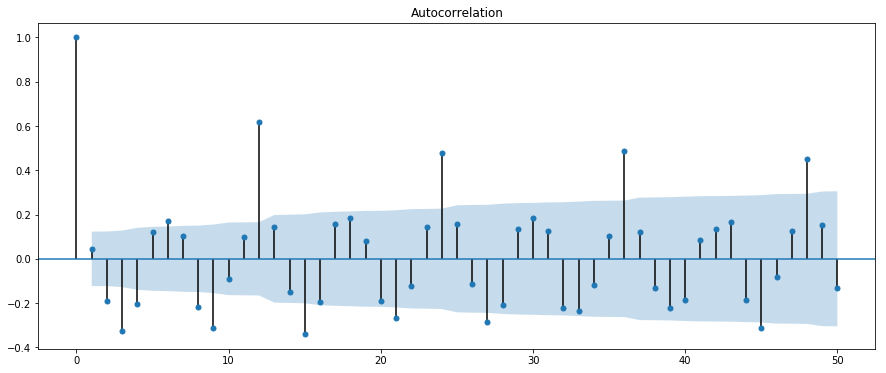

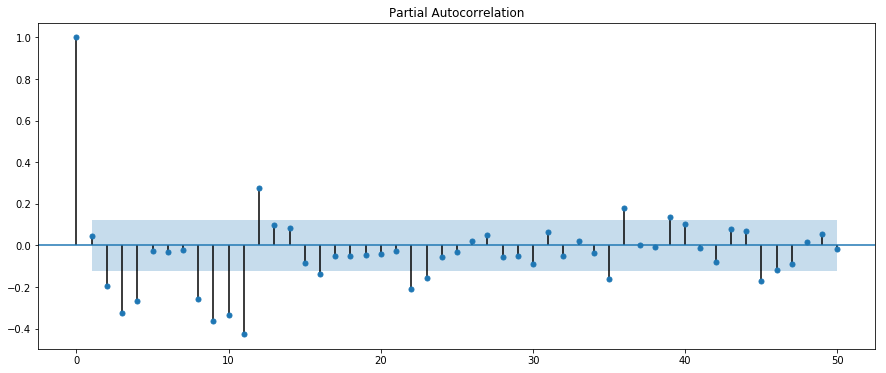

In [19]:
acf(SerieTd,nlags=50,unbiased=False)
plot_acf(SerieTd,lags=50,unbiased=False)
pacf(SerieTd,nlags=50)
plot_pacf(SerieTd,lags=50)

La función de autocorrelación parcial (PACF) muestra una dependencia estacional de periodo 12, luego se procedera a diferenciar la serie una vez mas, esta vez seran las diferencias de las observaciones rezagadas 12 periodos de tiempo. 

### Diferencia estacional (orden 12)

Existen casos en los cuales la no estacionariedad de la serie es debida a comportamientos cíclicos o estacionales, 
es aquí cuando los modelos SARIMA son necesarios, cuando existe la presencia de una raíz unitaria estacional. 
La prueba de Dickey Fuller arrojó que existe raíz unitaria estacional. 
El $ pvalor = 0.67 $, es decir, no se rechaza la hipótesis nula $H_{0}:$ Existe raíz unitaria.

In [20]:
from statsmodels.tsa.stattools import adfuller
test1 = adfuller(SerieT, regression='nc')
dfoutput = pd.Series(test1[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print (dfoutput)

Test Statistic                  -0.020276
p-value                          0.677494
#Lags Used                      16.000000
Number of Observations Used    237.000000
dtype: float64


Otra herramienta bastante útil que ayuda a determinar la presencia y el periodo de la estacionalidad en la serie, es el gráfico "monthplot", 
ya que este gráfico muestra las subseries para cada periodo de tiempo, en este caso, periodos mensuales.
A continuación se presenta el gráfico monthplot para la serie diferenciada ordinariamente.

Text(0.5, 1.0, 'Serie de producción de azucar diferenciada estacionalmente')

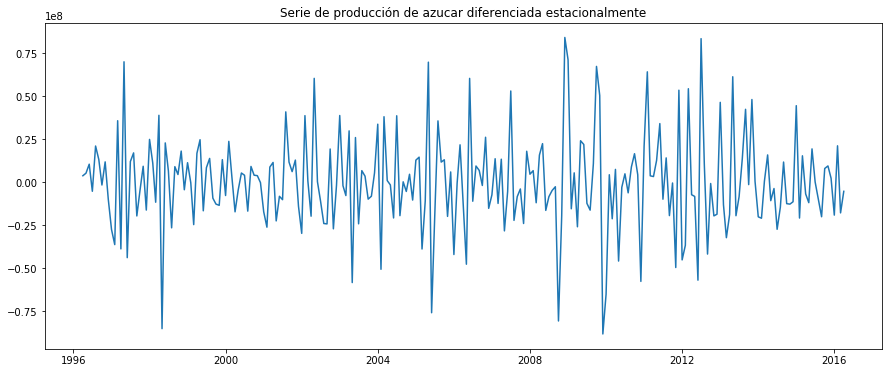

In [21]:
SerieTD = SerieTd.diff(periods=12)[12:]
plt.plot(SerieTD)
plt.title('Serie de producción de azucar diferenciada estacionalmente')

Se observa que la media de la serie de tiempo no es constante, lo cual hace que el proceso estocástico sea no estacionario.

El monthplot para la serie diferenciada ordinariamente sugiere diferenciar la serie actual 12 rezagos.

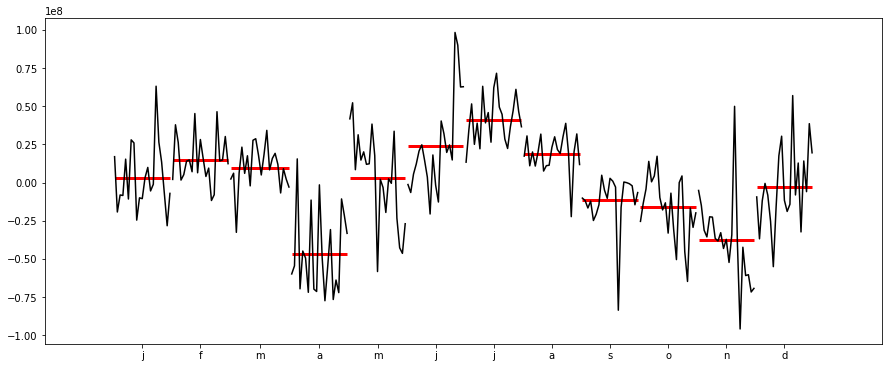

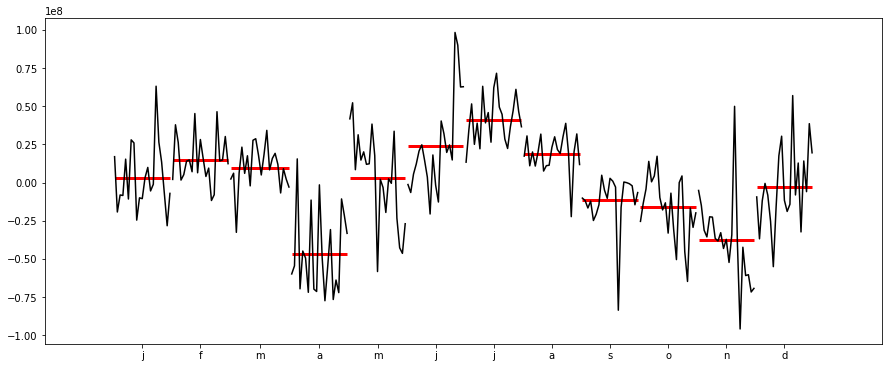

In [22]:
smapi.graphics.tsa.month_plot(SerieTd)

El monthplot para la serie diferenciada ordianria y estacionalmente muestra que su media es constante, lo cual sugiere que la serie 
diferenciada es estacionaria.


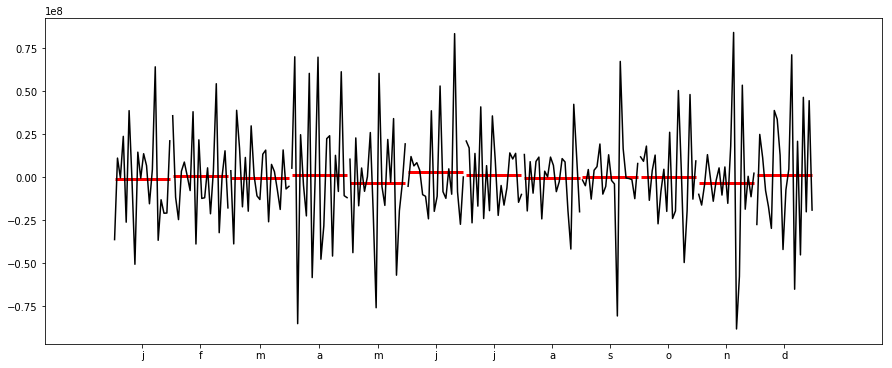

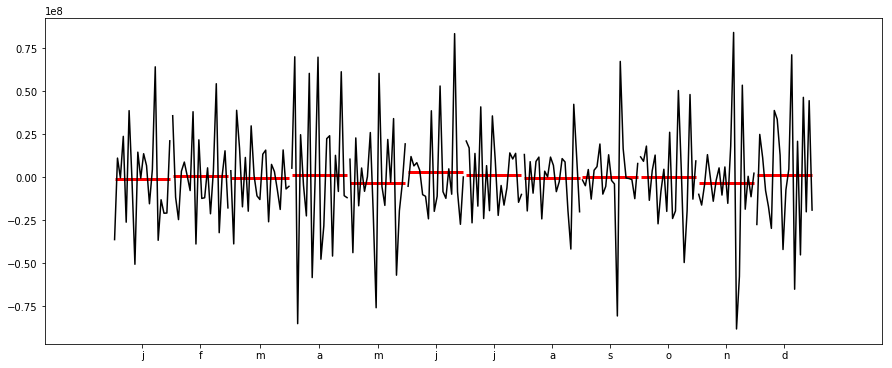

In [23]:
smapi.graphics.tsa.month_plot(SerieTD)

### ACF y PACF para la serie de tiempo diferenciada ordianria y estacionalmente. ##



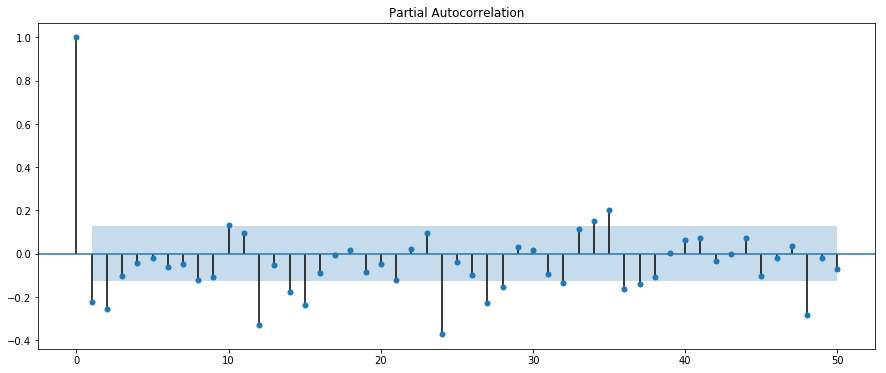

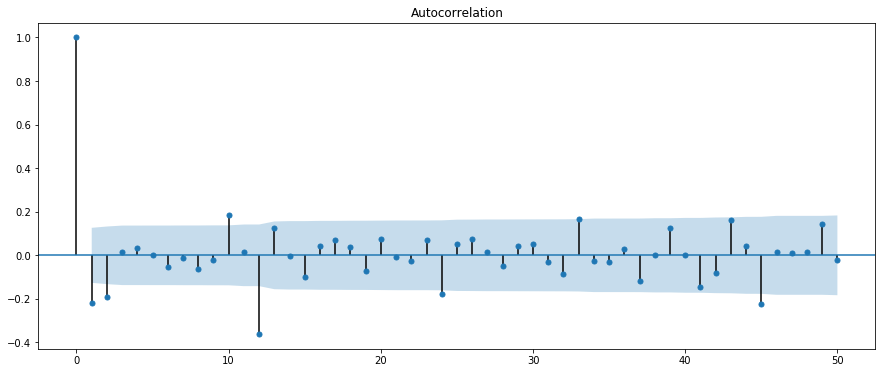

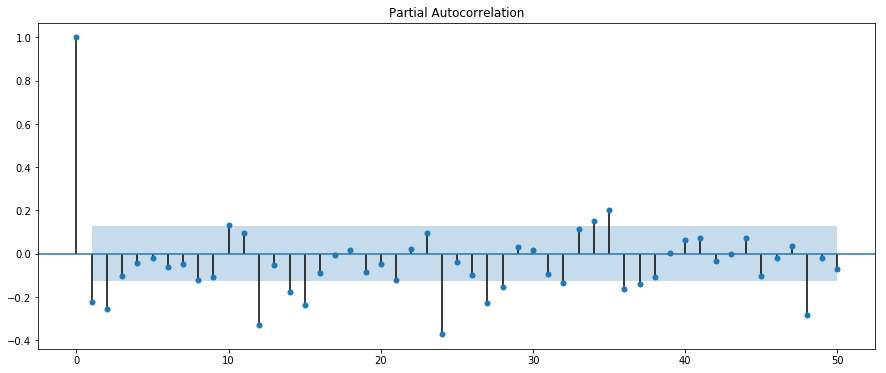

In [24]:
acf(SerieTD,nlags=50,unbiased=False)
plot_acf(SerieTD,lags=50,unbiased=False)
pacf(SerieTD,nlags=50)
plot_pacf(SerieTD,lags=50)

sobre las ...

### Modelo estructural 

Se procede a estimar cada una de las componentes por medio de las siguientes líneas, no obstante ha de considerarse que la estadística z y el pvalor no tienen algun significado dentro del proceso.


In [25]:
from pandas_datareader import DataReader  
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
import pandas as pd
unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

output_mod = sm.tsa.UnobservedComponents(SerieT, **unrestricted_model)  
output_res = output_mod.fit(method='powell', disp=False) 
print(output_res.summary()) 



                            Unobserved Components Results                            
Dep. Variable:                             y   No. Observations:                  254
Model:                    local linear trend   Log Likelihood               -4654.822
                   + damped stochastic cycle   AIC                           9321.645
Date:                       Tue, 09 Jul 2019   BIC                           9342.773
Time:                               20:32:48   HQIC                          9330.148
Sample:                           02-28-1995                                         
                                - 03-31-2016                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  8.355e-08    7.8e+05   1.07e-13      1

### Modelo SARIMA

Lueo de analizar las acf y pacf para la serie diferenciada ordinaria y estacionalmente se puede ver
claramente que hay varios ordenes para los cuales las autocorrelaciones parecen ser significativas, 
como tambien la presencia de patrones de tipo estacional en estas autocorrelaciones.<br>


In [26]:
Sarima1 = smapi.tsa.statespace.SARIMAX(SerieT, order=(1,1,1),seasonal_order=(0,1,1,12))
results1 = Sarima1.fit()
print(results1.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  254
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -4422.552
Date:                            Tue, 09 Jul 2019   AIC                           8853.104
Time:                                    20:32:52   BIC                           8867.044
Sample:                                02-28-1995   HQIC                          8858.720
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5831      0.119      4.881      0.000       0.349       0.817
ma.L1         -0.8867      0.083   

In [27]:
Sarima2 = smapi.tsa.statespace.SARIMAX(SerieT, trend='n', order=(2,1,0), seasonal_order=(2,1,0,12))  
results2 = Sarima2.fit()
print(results2.summary())


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  254
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -4433.114
Date:                            Tue, 09 Jul 2019   AIC                           8876.227
Time:                                    20:32:55   BIC                           8893.651
Sample:                                02-28-1995   HQIC                          8883.247
                                     - 03-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2234      0.059     -3.817      0.000      -0.338      -0.109
ar.L2         -0.1854      0.066   

# Análisis de residuales

Para realizar un análisis de los modelos propuestos verificamos los supuestos haciendo uso de los residuales 
de ambos modelos.

### Residuales modelo SARIMA(1,1,1)x(1,1,1,12)

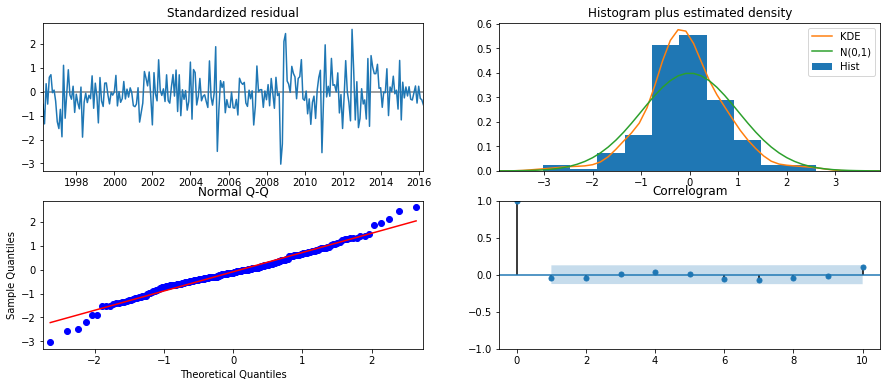

In [28]:
residuales=results1.resid   
results1.plot_diagnostics()
plt.show()



### Residuales modelo SARIMA(2,1,0)x(2,1,0,12)

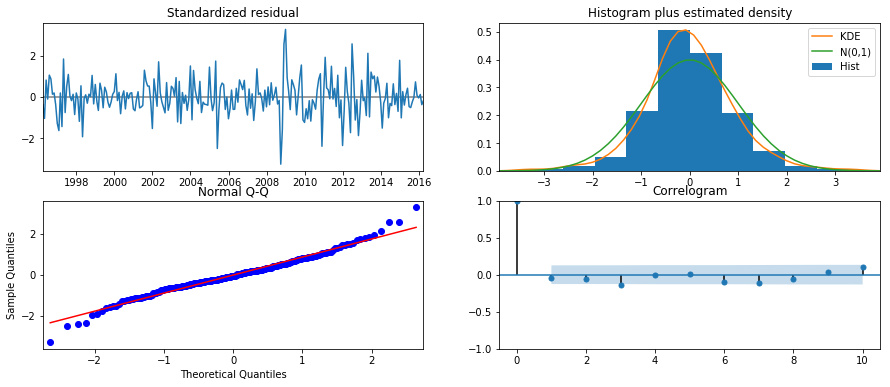

In [29]:
residuales2=results2.resid   
results2.plot_diagnostics()
plt.show()



* En los supuestos del modelo puede identificarse el qqplot los residuos están aproximadamente en la línea recta y la prueba Jarque Bera la cual no rechaza la hpótesis de normalidad.

* Se puede observar el pavlor de la estadística lijung-box que se cumple el supuesto de no autocorrelacion a un nivel de significancia del 5%



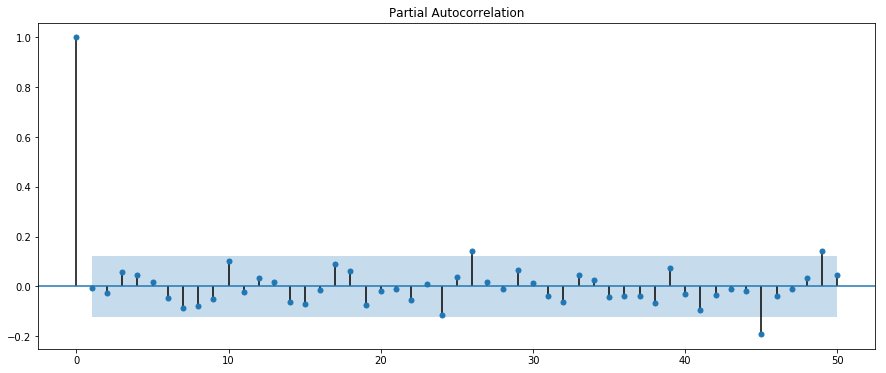

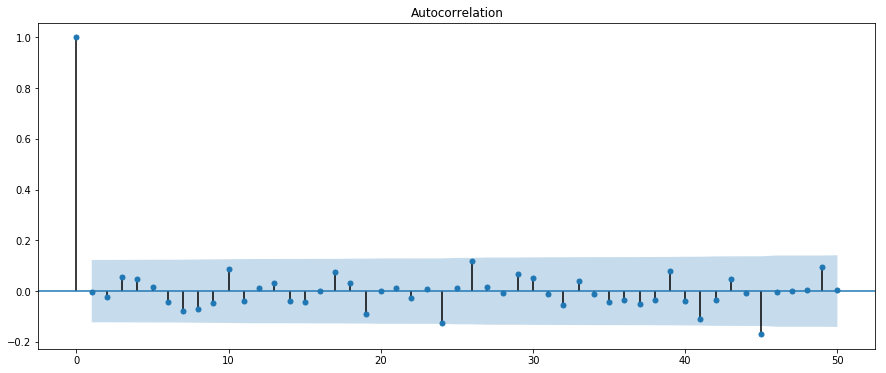

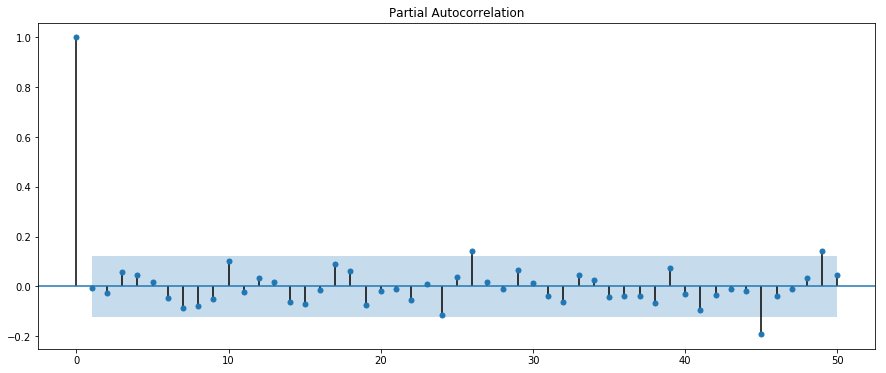

In [30]:
acf(residuales,nlags=50,unbiased=False)
plot_acf(residuales,lags=50,unbiased=False)
pacf(residuales,nlags=50)
plot_pacf(residuales,lags=50)

Observando los residuales del modelo, se puede observar que las funciones fac y pacf se comportan bien, lo 
que da indicios de un buen modelo a los datos.

# Pronósticos 

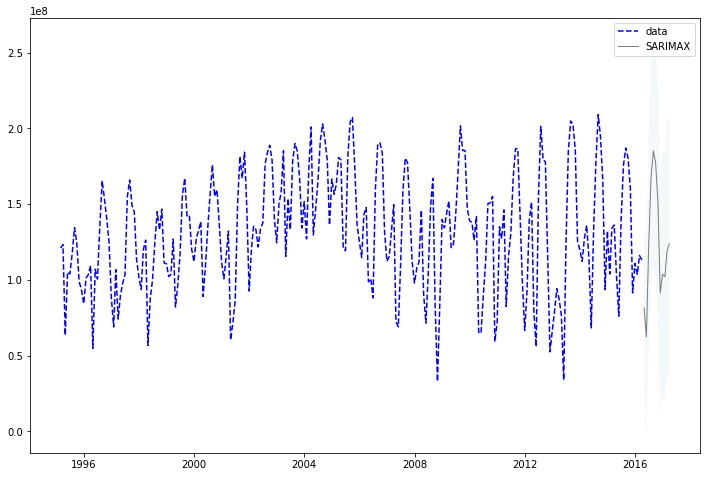

In [32]:
#%%#    PRONOSTICOS

pronosticos1=results1.forecast(steps=12)
salforecast1=results1.get_prediction(star=200, end= 320, full_results=True,alpha=0.05,dynamic=False)  #estas dos se compilan al mismo tienmpo
salforecast1.conf_int(alpha=0.05)

salforecast1=results1.get_forecast(steps=12)
ICforecast95_1=salforecast1.conf_int(alpha=0.05)
pronosticosMA_1=salforecast1.predicted_mean

#######Gráfica de los pronósticos#####
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Actual data
ax.plot(SerieT.astype('float64'), '--', color="blue", label='data')
# Means
ax.plot(pronosticos1, lw=1, color="black", alpha=0.5, label='SARIMAX')
ax.fill_between(pronosticos1.index, ICforecast95_1.iloc[:, 0], ICforecast95_1.iloc[:, 1], alpha=0.05)
ax.legend(loc='upper right')
plt.draw()


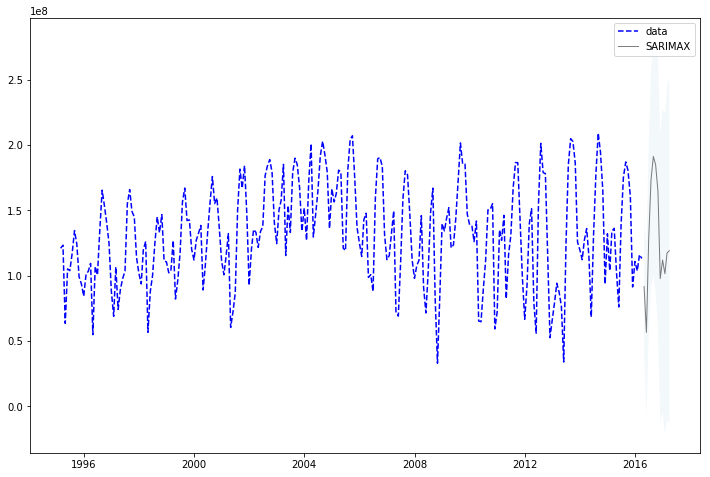

In [36]:
#%%#    PRONOSTICOS

pronosticos2=results2.forecast(steps=12)
salforecast2=results2.get_prediction(star=200, end= 320, full_results=True,alpha=0.05,dynamic=False)  #estas dos se compilan al mismo tienmpo
salforecast1.conf_int(alpha=0.05)

salforecast2=results2.get_forecast(steps=12)
ICforecast95_2=salforecast2.conf_int(alpha=0.05)
pronosticosMA_2=salforecast2.predicted_mean

#######Gráfica de los pronósticos#####
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Actual data
ax.plot(SerieT.astype('float64'), '--', color="blue", label='data')
# Means
ax.plot(pronosticos2, lw=1, color="black", alpha=0.5, label='SARIMAX')
ax.fill_between(pronosticos2.index, ICforecast95_2.iloc[:, 0], ICforecast95_2.iloc[:, 1], alpha=0.05)
ax.legend(loc='upper right')
plt.draw()


# Modelo estructural

Se procede a estimar cada una de las componentes por medio de las siguientes líneas, no obstante ha de considerarse que la estadística z y el pvalor no tienen algún significado dentro del proceso.


                            Unobserved Components Results                            
Dep. Variable:                             y   No. Observations:                  254
Model:                    local linear trend   Log Likelihood               -4654.822
                   + damped stochastic cycle   AIC                           9321.645
Date:                       Tue, 09 Jul 2019   BIC                           9342.773
Time:                               21:48:42   HQIC                          9330.148
Sample:                           02-28-1995                                         
                                - 03-31-2016                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  8.355e-08    7.8e+05   1.07e-13      1

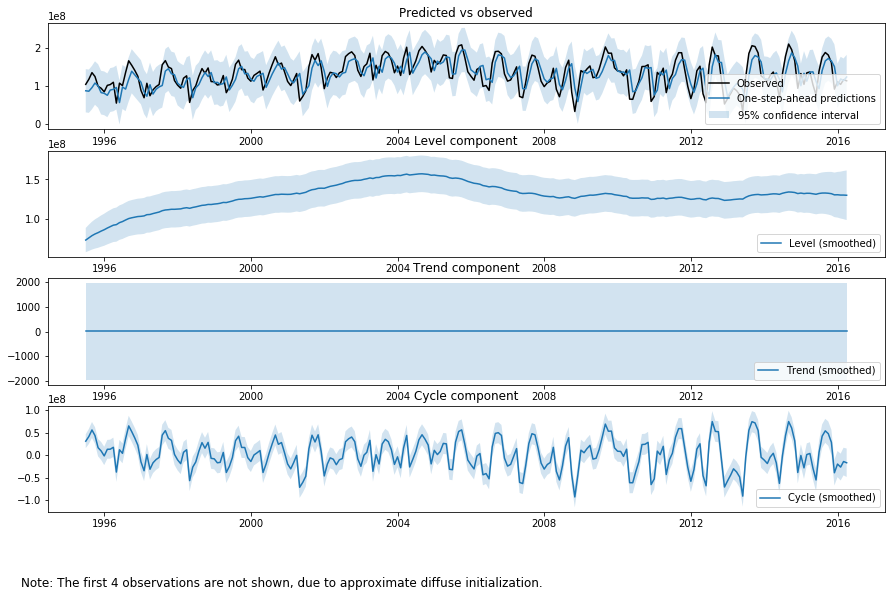

In [37]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as plt
import pandas as pd
unrestricted_model = {
    'level': 'local linear trend', 'cycle': True, 'damped_cycle': True, 'stochastic_cycle': True
}

output_mod = sm.tsa.UnobservedComponents(SerieT, **unrestricted_model)  
output_res = output_mod.fit(method='powell', disp=False) 
print(output_res.summary()) 

##Gráfico
fig = output_res.plot_components(legend_loc='lower right', figsize=(15, 9));  
output_res.forecast(12) 
log_gnp_forecast=output_res.get_prediction(start='2016-03-31', end='2017-03-31') 


No obstante se presentan los pronósticos en escala transformada:


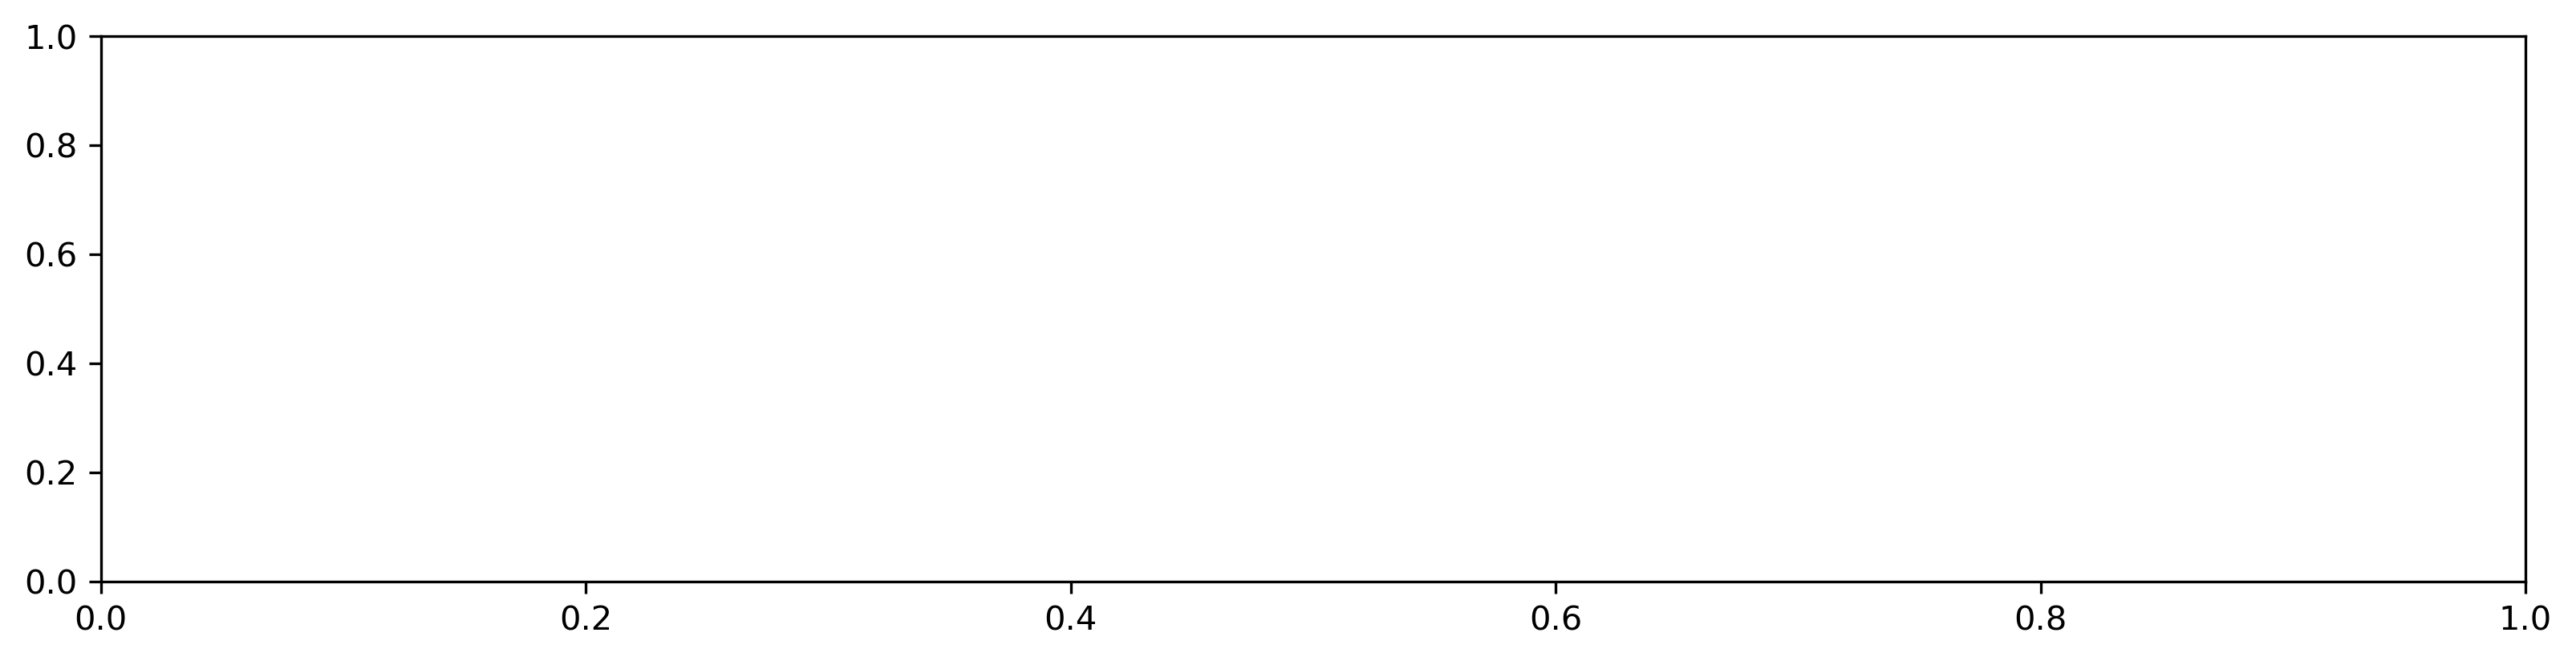

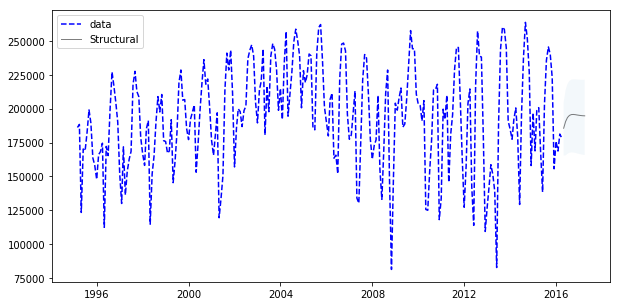

In [38]:
##Pronóstico
output_res.forecast(12)
log_gnp_forecast=output_res.get_prediction(start='2016-04', end='2017-03')

fig, ax = plt.subplots(figsize=(13, 3), dpi=300)
forecast = log_gnp_forecast.predicted_mean
forecast
ci = log_gnp_forecast.conf_int(alpha=0.5)
ci

arraypronosticosSTIC={'pronostico':forecast.values,'li':ci['lower y'].values,'ls':ci['upper y'].values}
indice=pd.date_range(start='2016-04', end='2017-04',freq='M')
pronosticosSTIC=pd.DataFrame(data=arraypronosticosSTIC,index=indice)

#####Función inversa Box-Cox######
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)



####Se devuelve  a la escala original
for column in ['pronostico', 'li', 'ls']:
    pronosticosSTIC[column] = inverse_boxcox(pronosticosSTIC[column],1.571)
    
    
#######Gráfica de los pronósticos#####
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1)
#Actual data
ax.plot(SerieAz.astype('float64'), '--', color="blue", label='data')
# Means
ax.plot(pronosticosSTIC['pronostico'], lw=1, color="black", alpha=0.5, label='Structural')
ax.fill_between(pronosticosSTIC['pronostico'].index, pronosticosSTIC.iloc[:, 1], pronosticosSTIC.iloc[:, 2], alpha=0.05)
ax.legend(loc='upper left')
plt.draw()



# Análisis del ECM

### Análisis pronósticos un paso adelante para el modelo SARIMA(1,1,1)x(1,1,1,12)

In [39]:
from sklearn.metrics import mean_squared_error

X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(1,1,1,12))
	modelo_fit = output_mod.fit(trend='t')
	output = modelo_fit.forecast(1)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))
    


Predicción=160919.390681, Esperado=158636.732370
Predicción=172652.511066, Esperado=205229.166895
Predicción=216266.450102, Esperado=216198.947172
Predicción=159068.145835, Esperado=143213.569610
Predicción=155487.548810, Esperado=114734.543888
Predicción=147750.507807, Esperado=218813.924809
Predicción=239509.102773, Esperado=259300.093878
Predicción=266508.949354, Esperado=240588.346537
Predicción=230828.510182, Esperado=239913.893646
Predicción=218679.628580, Esperado=179947.306885
Predicción=149923.811869, Esperado=110206.102694
Predicción=122801.571928, Esperado=128241.928967
Predicción=156778.895735, Esperado=144093.397199
Predicción=170717.565085, Esperado=159861.315021
Predicción=183585.224005, Esperado=152394.982964
Predicción=93027.607266, Esperado=140194.164683
Predicción=134734.829037, Esperado=83401.835306
Predicción=147020.446564, Esperado=190252.929027
Predicción=222351.682277, Esperado=245563.607746
Predicción=243807.531303, Esperado=262227.916508
Predicción=243951.9617

In [40]:
   error = mean_squared_error((inverse_boxcox(test, 1.57)), predicciones)
print('ECM: %.3f' % error)

ECM: 543564603.428


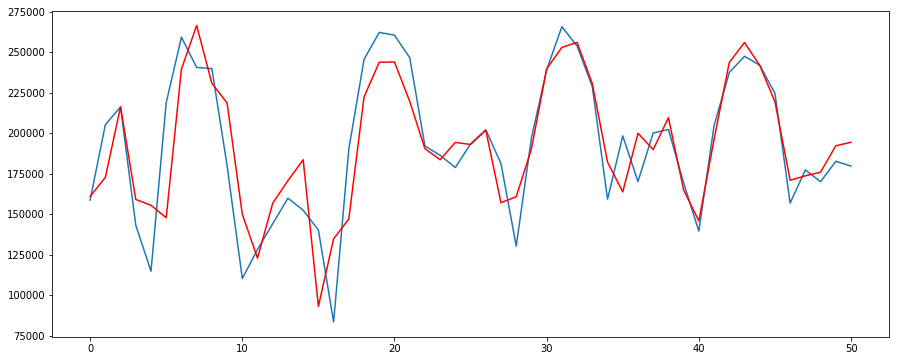

In [41]:
from matplotlib import pyplot
# plot
pyplot.plot(inverse_boxcox(test,1.57))
pyplot.plot(predicciones, color='red')
pyplot.show()

### Análisis pronósticos dos pasos adelante para el modelo SARIMA(1,1,1)x(1,1,1,12)

In [44]:
X1 = SerieT.values
size1 = int(len(X1) * 0.8)
train1, test1 = X1[0:size1], X1[size1:len(X)]
history1 = [x for x in train1]
predicciones1 = list()
for t in range(len(test)):
	output_mod1 = smapi.tsa.statespace.SARIMAX(history1, order=(1,1,1),seasonal_order=(1,1,1,12))
	modelo_fit1 = output_mod1.fit(trend='t')
	output1 = modelo_fit1.forecast(2)  ####Especificar los pasos adelante
	yhat1 = output1[0]
	predicciones1.append(inverse_boxcox(yhat1,1.57))
	obs1 = test1[t]
	history1.append(obs1)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat1,1.57), inverse_boxcox(obs1,1.57)))
 


Predicción=160919.390681, Esperado=158636.732370
Predicción=172652.511066, Esperado=205229.166895
Predicción=216266.450102, Esperado=216198.947172
Predicción=159068.145835, Esperado=143213.569610
Predicción=155487.548810, Esperado=114734.543888
Predicción=147750.507807, Esperado=218813.924809
Predicción=239509.102773, Esperado=259300.093878
Predicción=266508.949354, Esperado=240588.346537
Predicción=230828.510182, Esperado=239913.893646
Predicción=218679.628580, Esperado=179947.306885
Predicción=149923.811869, Esperado=110206.102694
Predicción=122801.571928, Esperado=128241.928967
Predicción=156778.895735, Esperado=144093.397199
Predicción=170717.565085, Esperado=159861.315021
Predicción=183585.224005, Esperado=152394.982964
Predicción=93027.607266, Esperado=140194.164683
Predicción=134734.829037, Esperado=83401.835306
Predicción=147020.446564, Esperado=190252.929027
Predicción=222351.682277, Esperado=245563.607746
Predicción=243807.531303, Esperado=262227.916508
Predicción=243951.9617

In [43]:
error = mean_squared_error((inverse_boxcox(test, 1.57)), predicciones)
print('ECM: %.3f' % error)

ECM: 543564603.428


### Análisis pronósticos un paso adelante para el modelo SARIMA(2,1,0)x(2,1,0,12)



In [45]:
X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(1,1,1,12))
	modelo_fit = output_mod.fit(trend='t')
	output = modelo_fit.forecast(1)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))
 

Predicción=160919.390681, Esperado=158636.732370
Predicción=172652.511066, Esperado=205229.166895
Predicción=216266.450102, Esperado=216198.947172
Predicción=159068.145835, Esperado=143213.569610
Predicción=155487.548810, Esperado=114734.543888
Predicción=147750.507807, Esperado=218813.924809
Predicción=239509.102773, Esperado=259300.093878
Predicción=266508.949354, Esperado=240588.346537
Predicción=230828.510182, Esperado=239913.893646
Predicción=218679.628580, Esperado=179947.306885
Predicción=149923.811869, Esperado=110206.102694
Predicción=122801.571928, Esperado=128241.928967
Predicción=156778.895735, Esperado=144093.397199
Predicción=170717.565085, Esperado=159861.315021
Predicción=183585.224005, Esperado=152394.982964
Predicción=93027.607266, Esperado=140194.164683
Predicción=134734.829037, Esperado=83401.835306
Predicción=147020.446564, Esperado=190252.929027
Predicción=222351.682277, Esperado=245563.607746
Predicción=243807.531303, Esperado=262227.916508
Predicción=243951.9617

In [46]:
error = mean_squared_error((inverse_boxcox(test, 1.57)), predicciones)
print('ECM: %.3f' % error)

ECM: 543564603.428


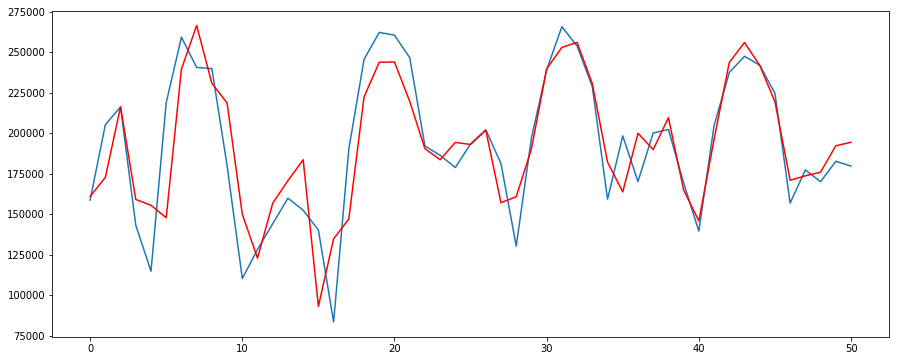

In [47]:
from matplotlib import pyplot
# plot
pyplot.plot(inverse_boxcox(test,1.57))
pyplot.plot(predicciones, color='red')
pyplot.show()

### Análisis pronósticos un paso adelante para el modelo SARIMA(2,1,0)x(2,1,0,12)


In [48]:
X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(1,1,1,12))
	modelo_fit = output_mod.fit(trend='t')
	output = modelo_fit.forecast(1)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))
 

Predicción=160919.390681, Esperado=158636.732370
Predicción=172652.511066, Esperado=205229.166895
Predicción=216266.450102, Esperado=216198.947172
Predicción=159068.145835, Esperado=143213.569610
Predicción=155487.548810, Esperado=114734.543888
Predicción=147750.507807, Esperado=218813.924809
Predicción=239509.102773, Esperado=259300.093878
Predicción=266508.949354, Esperado=240588.346537
Predicción=230828.510182, Esperado=239913.893646
Predicción=218679.628580, Esperado=179947.306885
Predicción=149923.811869, Esperado=110206.102694
Predicción=122801.571928, Esperado=128241.928967
Predicción=156778.895735, Esperado=144093.397199
Predicción=170717.565085, Esperado=159861.315021
Predicción=183585.224005, Esperado=152394.982964
Predicción=93027.607266, Esperado=140194.164683
Predicción=134734.829037, Esperado=83401.835306
Predicción=147020.446564, Esperado=190252.929027
Predicción=222351.682277, Esperado=245563.607746
Predicción=243807.531303, Esperado=262227.916508
Predicción=243951.9617

In [49]:
error = mean_squared_error((inverse_boxcox(test, 1.57)), predicciones)
print('ECM: %.3f' % error)

ECM: 543564603.428


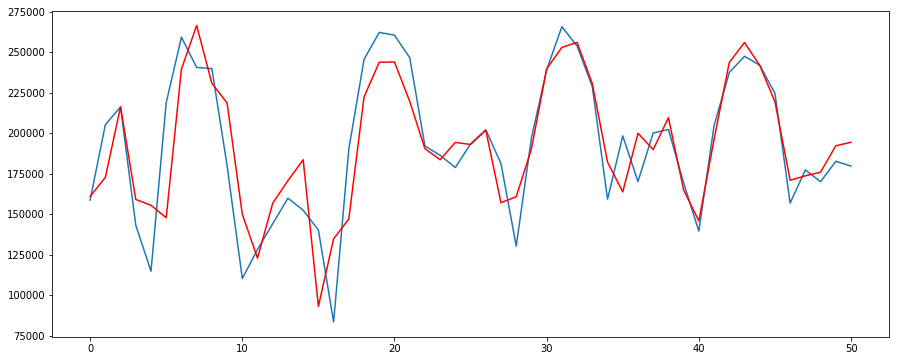

In [50]:
from matplotlib import pyplot
# plot
pyplot.plot(inverse_boxcox(test,1.57))
pyplot.plot(predicciones, color='red')
pyplot.show()

### Análisis pronósticos dos pasos adelante para el modelo SARIMA(2,1,0)x(2,1,0,12)


In [ ]:
X = SerieT.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()
for t in range(len(test)):
	output_mod = smapi.tsa.statespace.SARIMAX(history, order=(1,1,1),seasonal_order=(1,1,1,12))
	modelo_fit = output_mod.fit(trend='t')
	output = modelo_fit.forecast(1)  ####Especificar los pasos adelante
	yhat = output[0]
	predicciones.append(inverse_boxcox(yhat,1.57))
	obs = test[t]
	history.append(obs)
	print('Predicción=%f, Esperado=%f' % (inverse_boxcox(yhat,1.57), inverse_boxcox(obs,1.57)))

In [ ]:
error = mean_squared_error((inverse_boxcox(test, 1.57)), predicciones)
print('ECM: %.3f' % error)

In [ ]:
# plot
pyplot.plot(inverse_boxcox(test,1.57))
pyplot.plot(predicciones, color='red')
pyplot.show()

# Conclusiones